# M.3. SPX Sector Metrics

### DRW / UChicago Prep Course

#### Chicago, Summer 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import patches as mpatches

***

# Load Data

In [3]:
FILE_DATA = '../data/spx_metrics.xlsx'

with pd.ExcelFile(FILE_DATA) as xls:
    bdp_df = pd.read_excel(xls, sheet_name='Single Name Stats', index_col='ticker')
    sector_metrics = pd.read_excel(xls, sheet_name='Sector Stats', index_col='gics_sector_name')
    names = pd.read_excel(xls, sheet_name='Ticker Names', index_col='ticker')

# Normalize column names to lower-case
bdp_df.columns = [c.lower() for c in bdp_df.columns]
sector_metrics.columns = [c.lower() for c in sector_metrics.columns]

In [5]:
metrics = bdp_df.columns
# Map ticker to sector for coloring
ticker_to_sector = bdp_df['gics_sector_name']
# Prepare sector color map
sectors = sector_metrics.index.tolist()
cmap = get_cmap('tab20', len(sectors))
color_map = {s: cmap(i) for i, s in enumerate(sectors)}

/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_4635/3432512472.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', len(sectors))


***

# Sector Stats

/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_4635/2578127923.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', len(sectors))


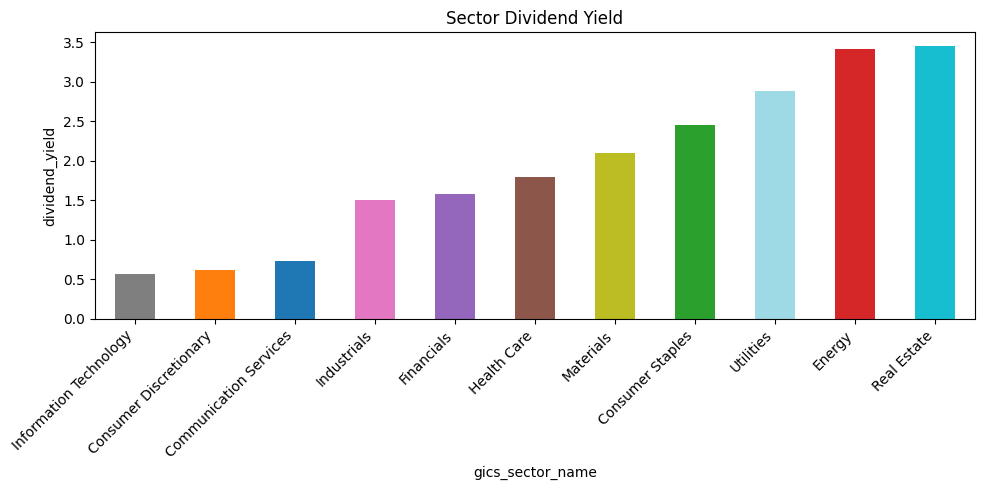

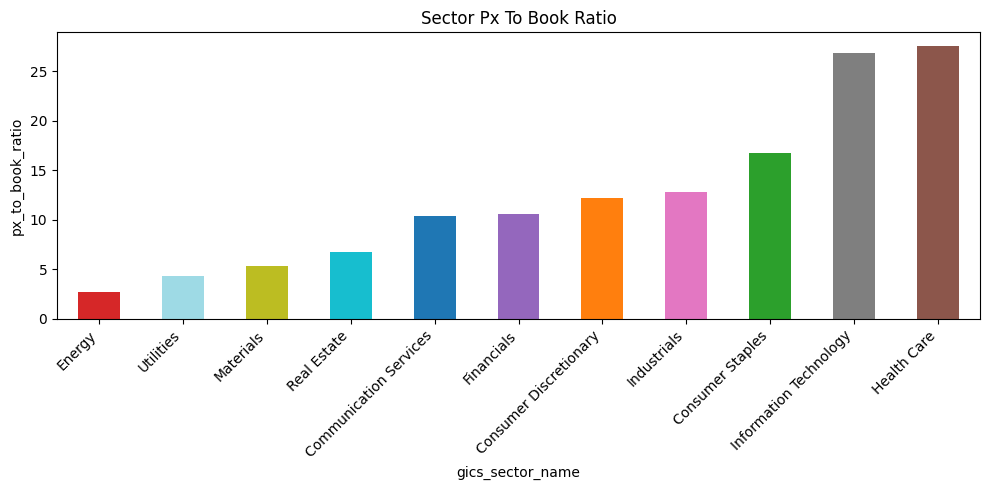

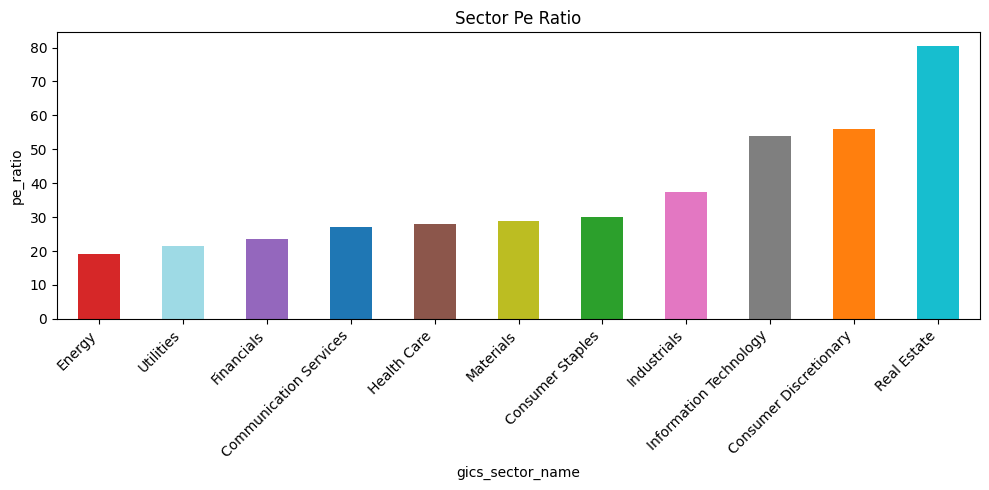

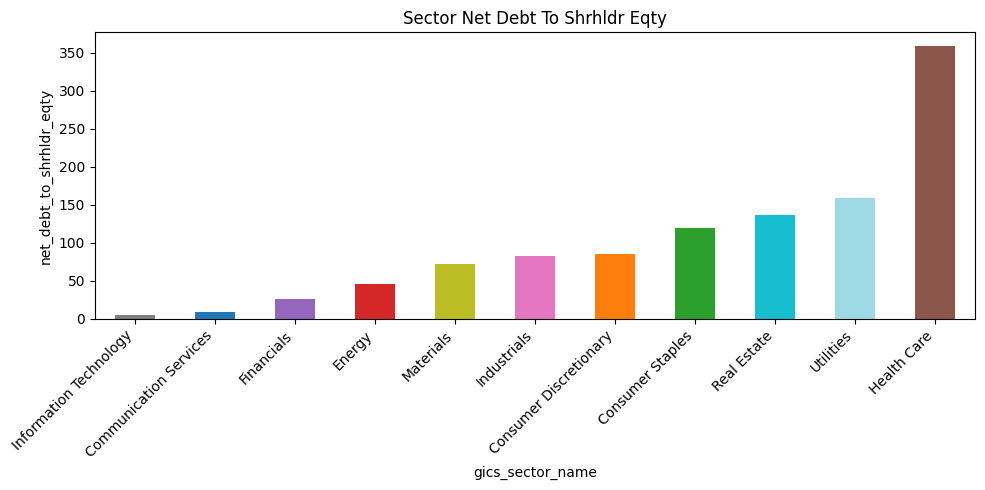

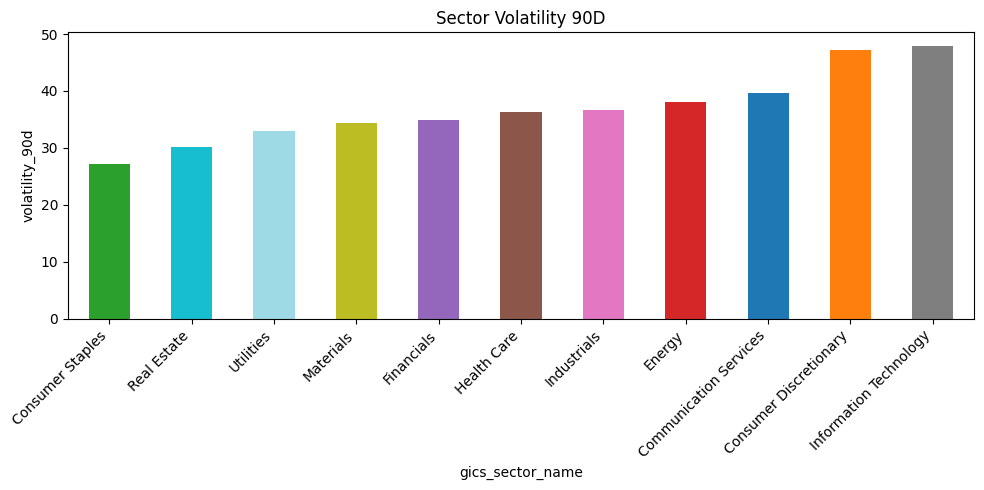

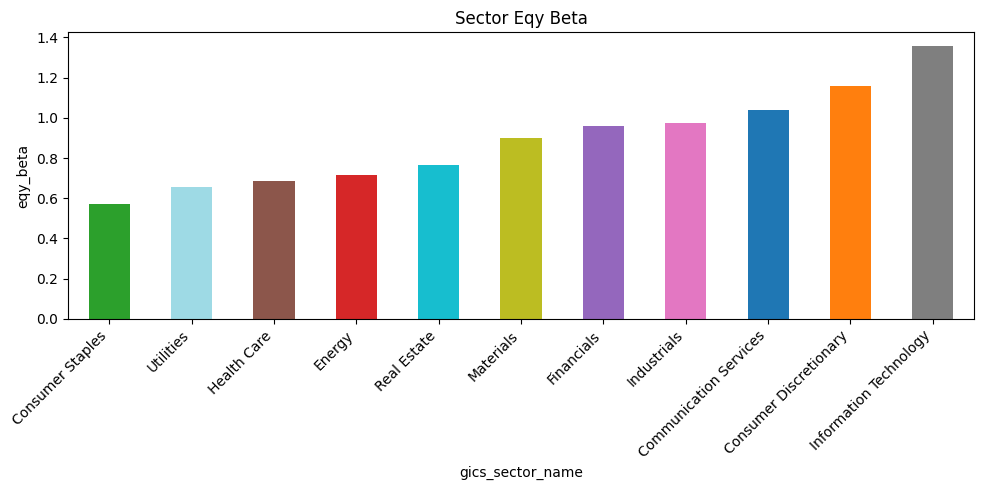

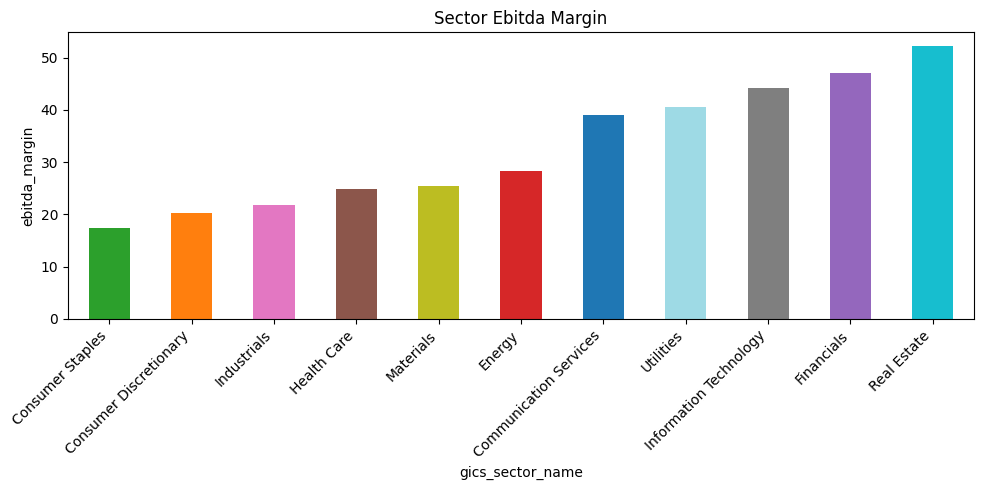

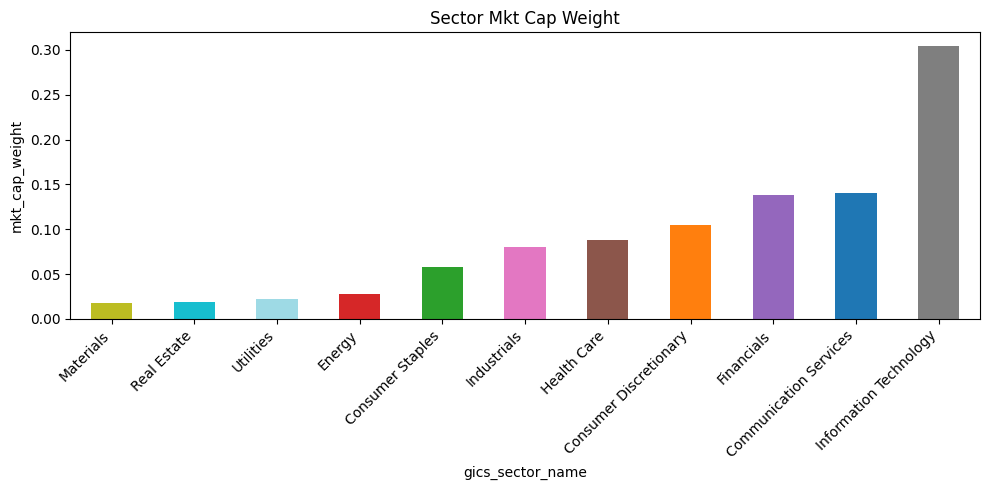

In [6]:
# ----------------------------------------
# PREPARE SECTOR COLOR MAP
# ----------------------------------------
sectors = sector_metrics.index.tolist()
cmap = get_cmap('tab20', len(sectors))
color_map = {s: cmap(i) for i, s in enumerate(sectors)}

# ----------------------------------------
# VISUALIZE SECTOR VARIATION
# ----------------------------------------
for metric in sector_metrics.columns:
    if metric == 'cur_mkt_cap': continue
    vals = sector_metrics[metric].sort_values()
    colors = [color_map[s] for s in vals.index]
    plt.figure(figsize=(10, 5))
    vals.plot(kind='bar', color=colors)
    plt.title(f"Sector {metric.replace('_', ' ').title()}")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

***

# Individual Names - Highs and Lows

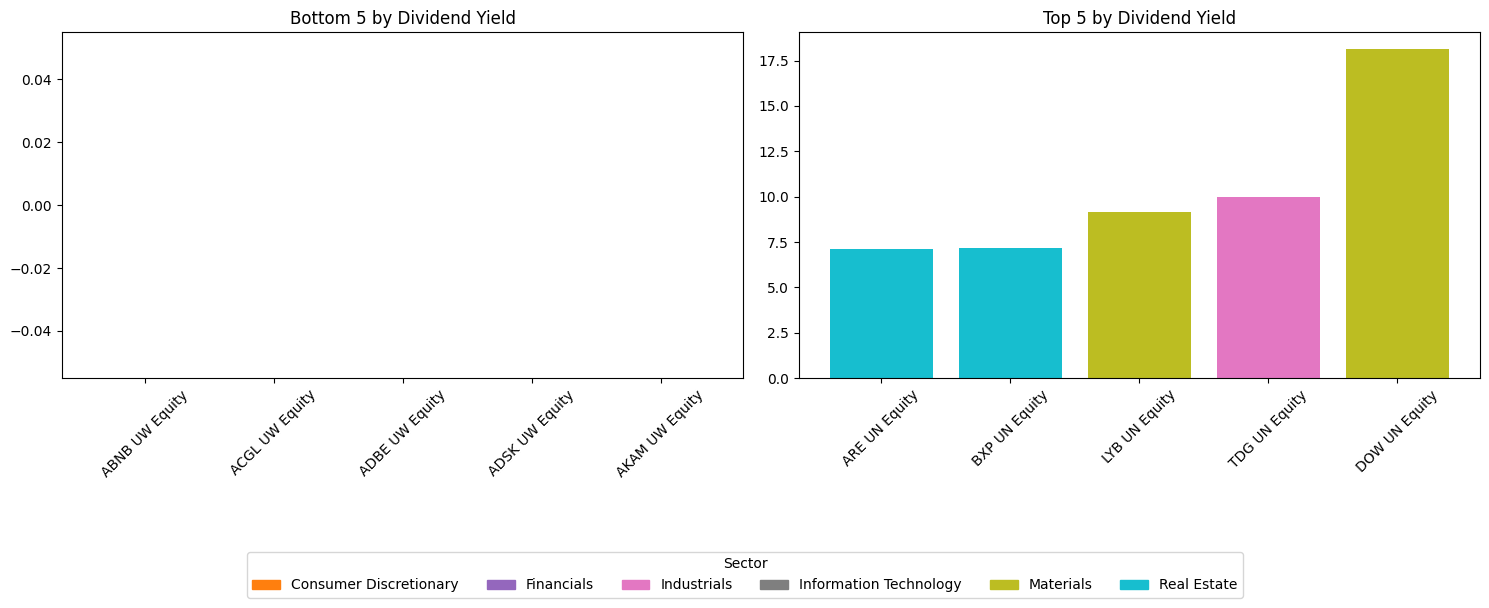

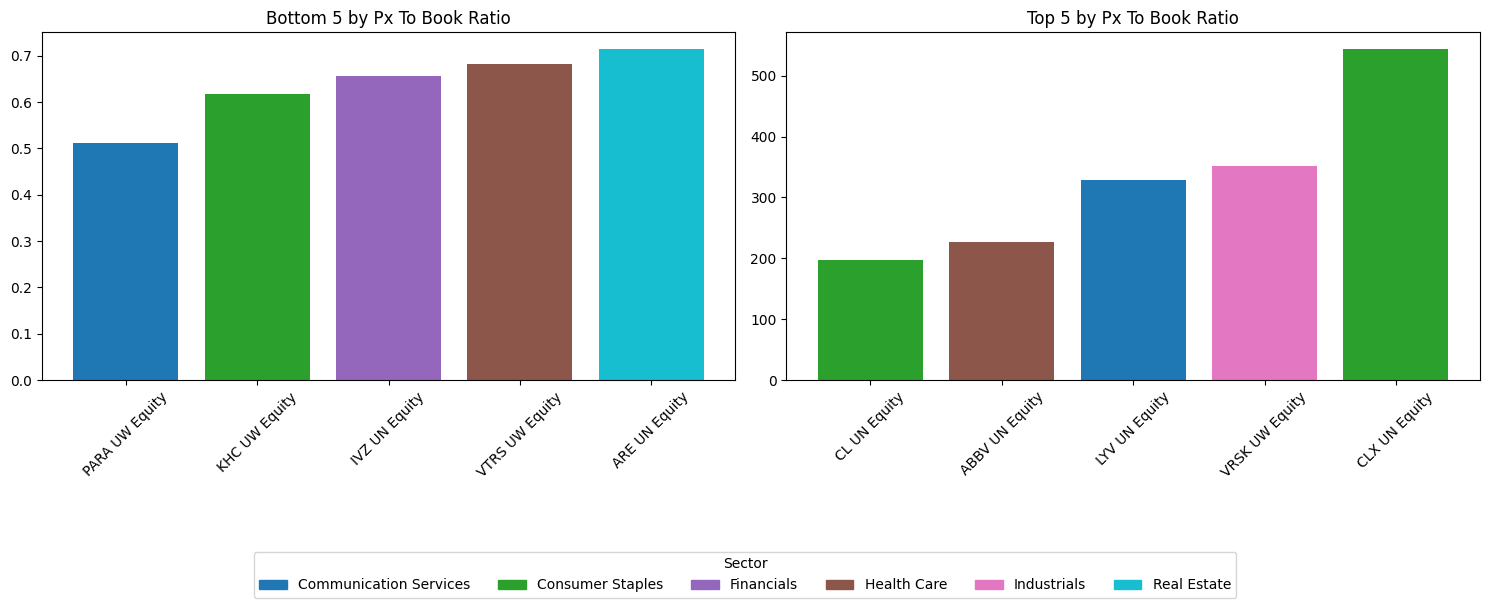

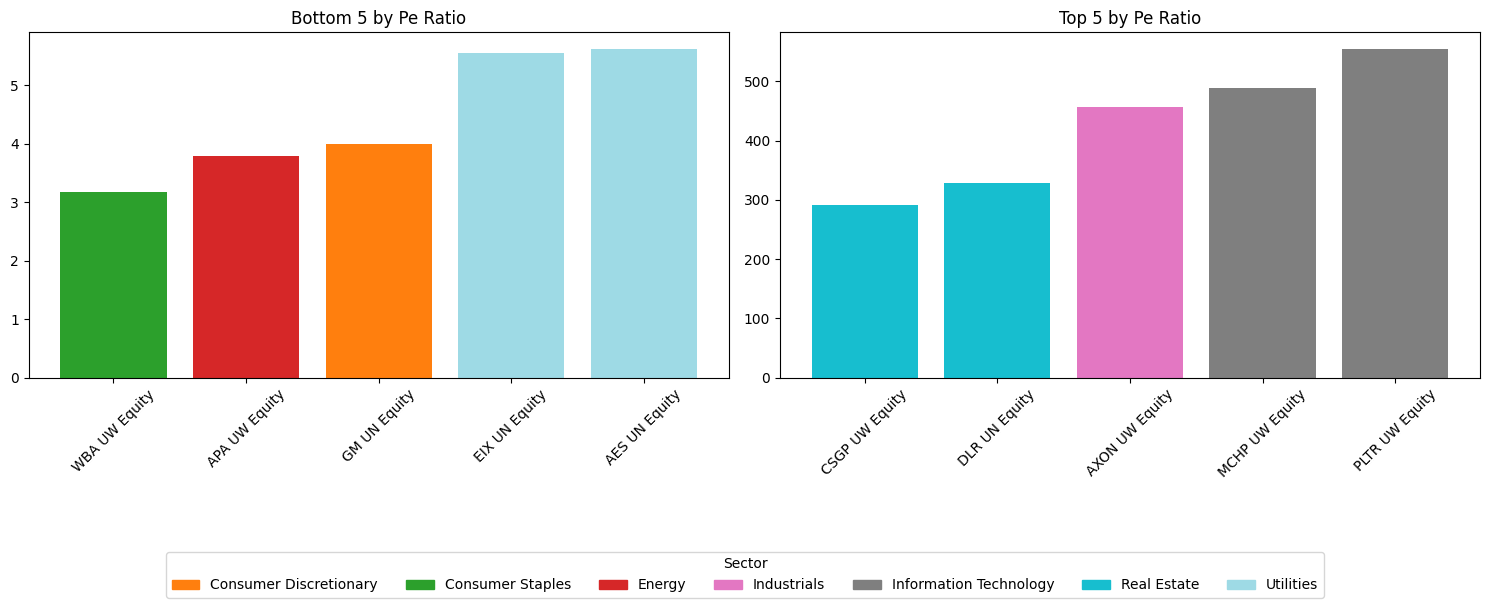

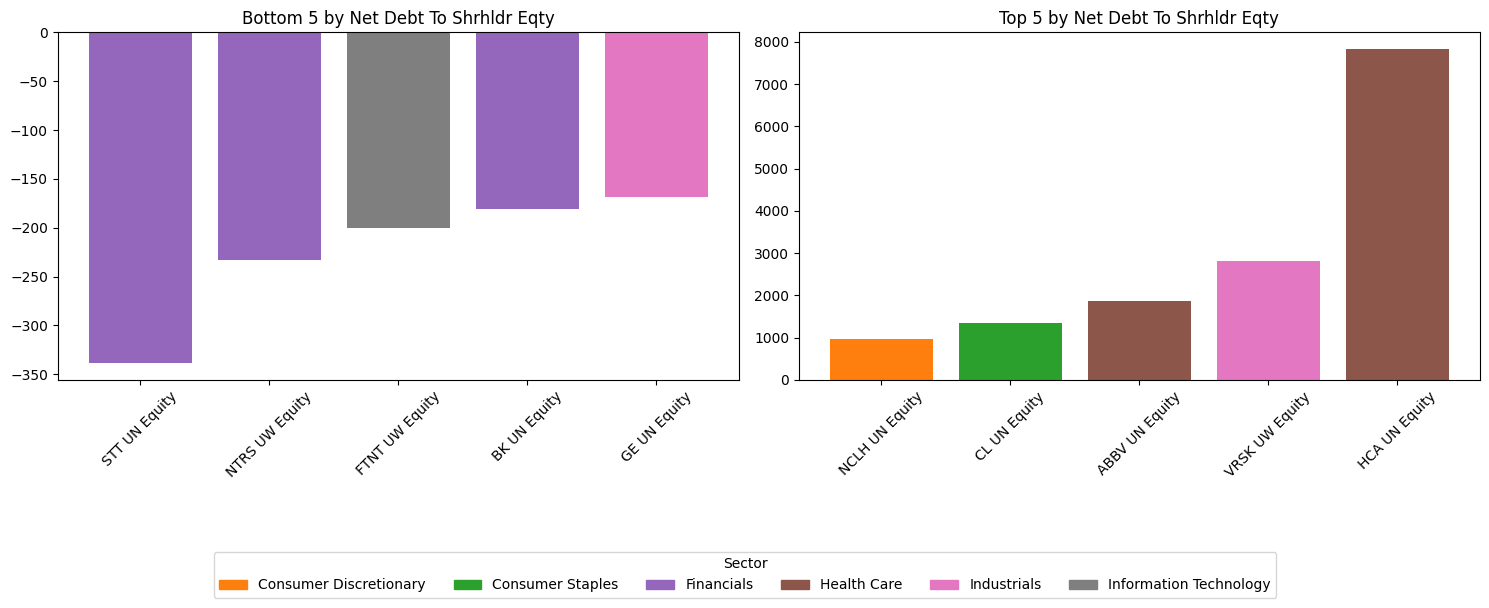

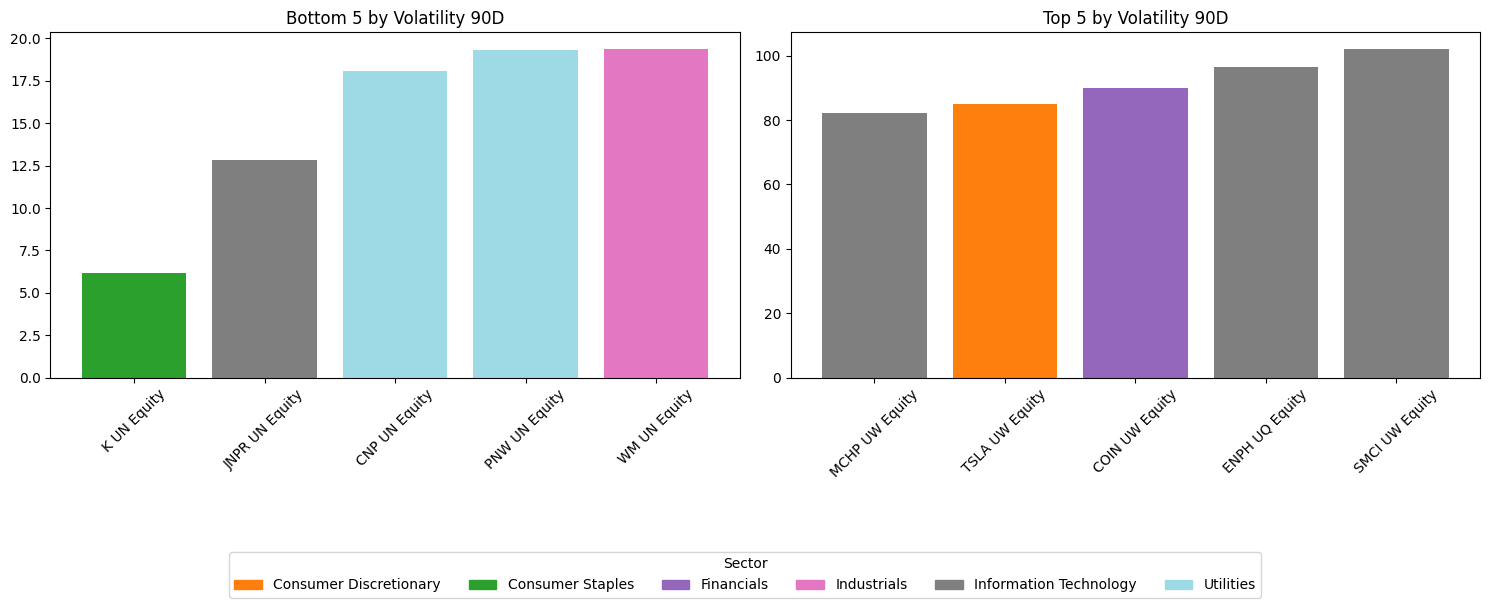

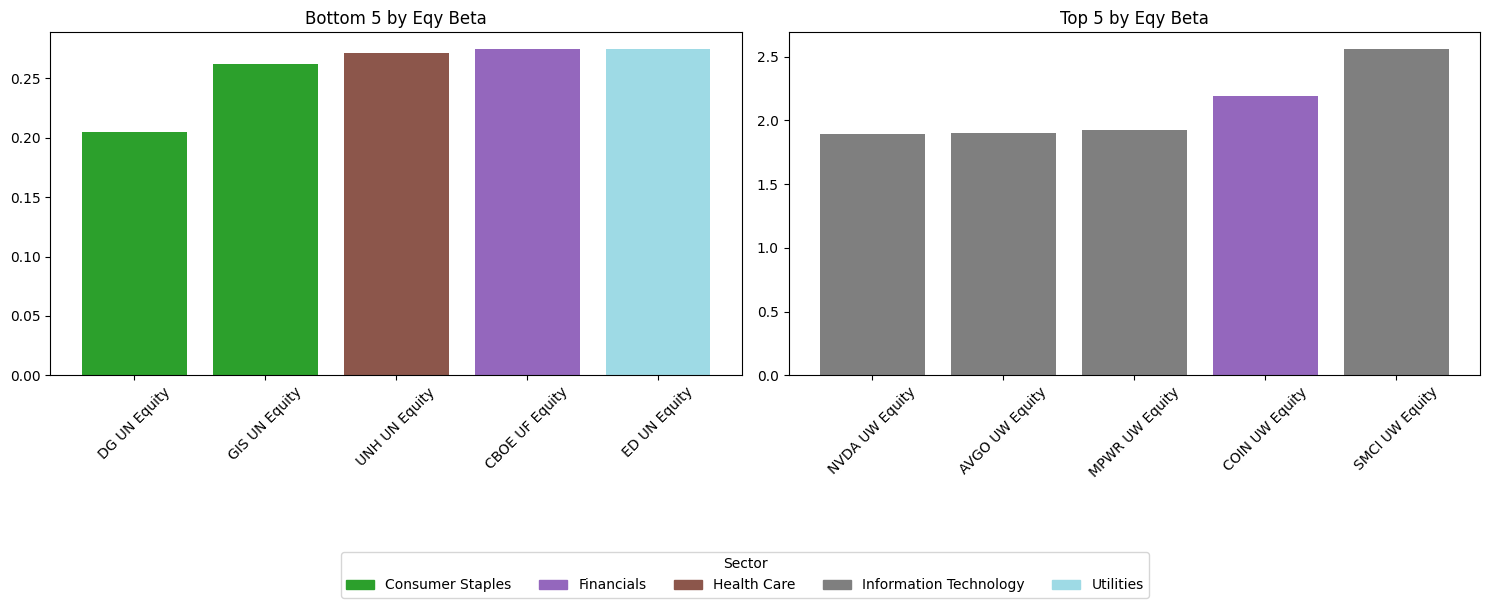

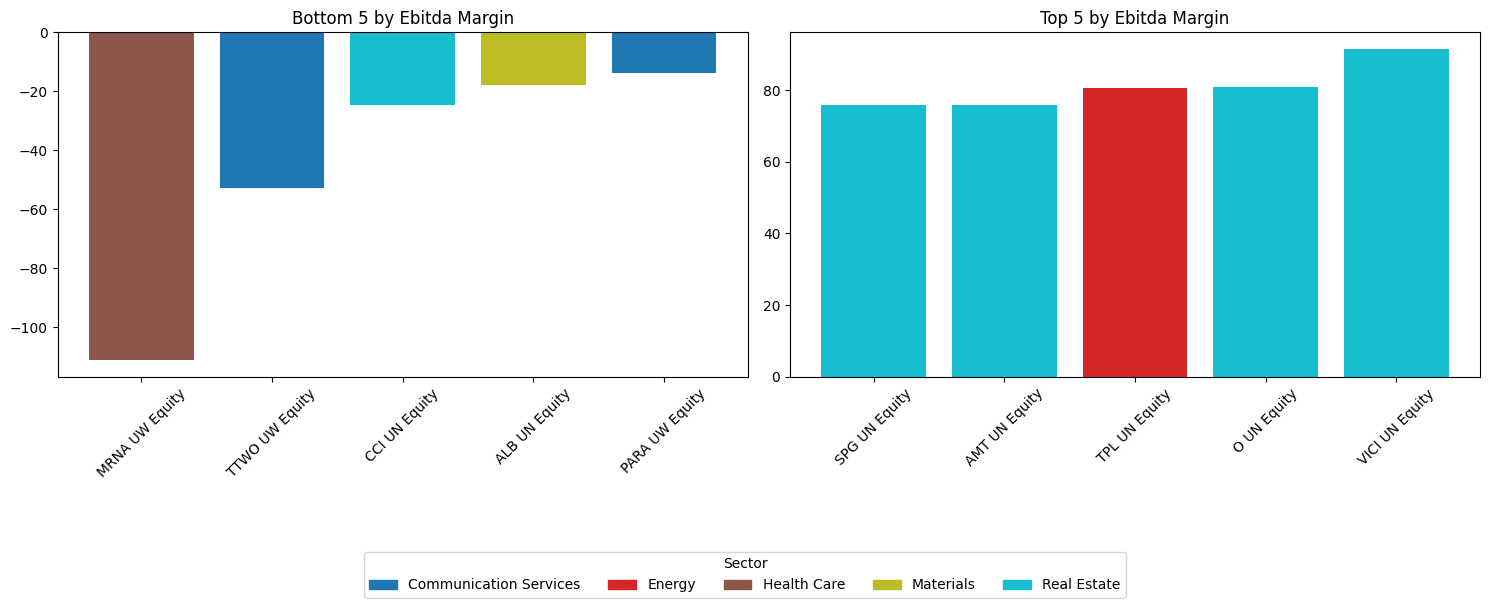

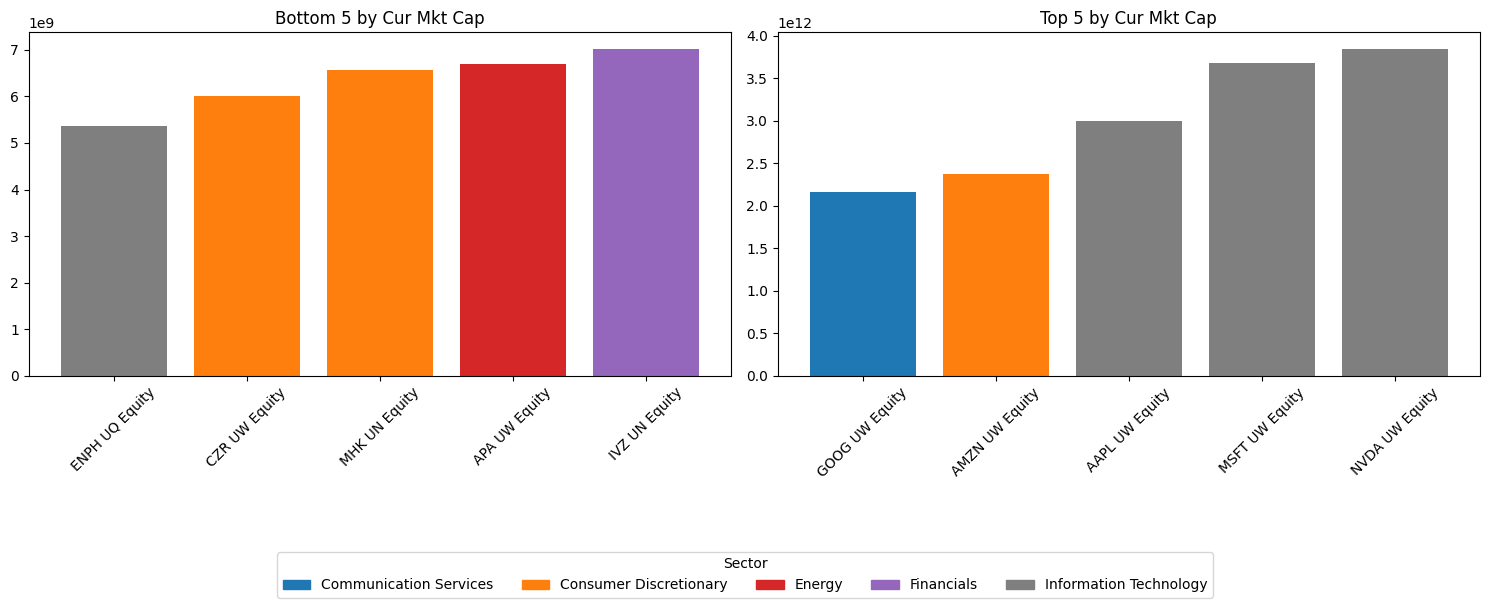

In [7]:
# ----------------------------------------
# TOP & BOTTOM STOCKS PER METRIC
# ----------------------------------------
ticker_to_sector = bdp_df['gics_sector_name']
for m in metrics:
    if m not in bdp_df.columns: continue
    series = pd.to_numeric(bdp_df[m], errors='coerce').dropna()
    if len(series) < 2: continue
    top5 = series.nlargest(5)
    bot5 = series.nsmallest(5)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
    bot = bot5.sort_values()
    axes[0].bar(bot.index, bot.values, color=[color_map[ticker_to_sector.loc[t]] for t in bot.index])
    axes[0].set_title(f"Bottom 5 by {m.replace('_', ' ').title()}")
    axes[0].tick_params(axis='x', rotation=45)
    top = top5.sort_values()
    axes[1].bar(top.index, top.values, color=[color_map[ticker_to_sector.loc[t]] for t in top.index])
    axes[1].set_title(f"Top 5 by {m.replace('_', ' ').title()}")
    axes[1].tick_params(axis='x', rotation=45)
    unique_secs = sorted({ticker_to_sector.loc[i] for i in list(bot.index)+list(top.index)})
    handles = [mpatches.Patch(color=color_map[s], label=s) for s in unique_secs]
    fig.legend(handles=handles, title='Sector', bbox_to_anchor=(0.5,-0.1), loc='upper center', ncol=len(handles))
    plt.tight_layout()
    plt.show()